# Linear Regression and kNN Models

**Objective**

Create simple machine learning pipeline to perform an exploratory data analysis, train different models, and evaluate their overall performance. I want to predice the `median_house_value` by using other predictors (aka columns) of the dataset below.

**Dataset**

The California Housing (https://github.com/ageron/handson-ml2/tree/master/datasets/housing)

In [1]:
# Load the housing dataset by importing the `numpy` library as `np` and `pandas` as `pd`.
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [2]:
# Upload the dataset
housing = pd.read_csv("housing.csv")

In [3]:
# Call different methods to examine the dataset
housing.head(5) # Display the first # of rows of the DataFrame
housing.info() # Prints concise summary of a DataFrame
housing.describe() # Computes summary statistics for DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
* Number of rows: 20,640
* Data types: float (9) - quantitative and object (1) - qualitative

In [4]:
# Review the count of missing values
pd.isna(housing).sum() # Returns Series object that sums missing/null values 
housing.isnull().sum() # Returns Series object that sums the boolean (False) missing/null values 
housing.isnull().any() # Returns boolean value if there are missing/null values

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [5]:
# Check the shape of the dataframe
housing.shape  # Dimensions of Panda/NumPy type objects

(20640, 10)

### Exploratory Data Analysis

In [6]:
from pandas.plotting import scatter_matrix

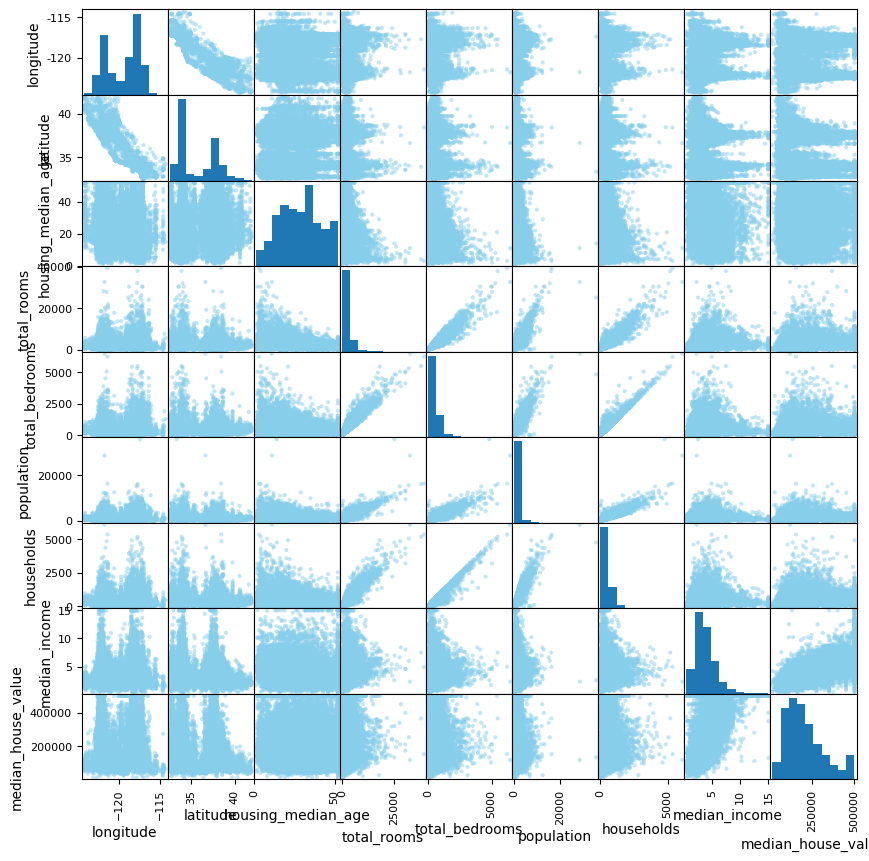

In [7]:
housing_quant = housing.drop("ocean_proximity", axis = 'columns') # Removes the qualatative value by creating a new DataFrame
housing_quant.head(n = 10) # Display the first # of rows of the DataFrame
scatter_matrix(housing_quant, figsize = (10, 10), color = 'skyblue'); # Creates  a scatterplot with only quantative variables with certain figure dimensions

# Note: ; replaces plt.show() function 

The `median_income` appears to be the most correlated with the target variable `median_house_value`.

The predictors `total_rooms`, `total_bedrooms`, `population`, and `households` are the most skewed. A log transformation would help to make their distribution more symmetric.

The features total_rooms, total_bedrooms, population, and households are strongly correlated with each other.

### Data Transformation

In [8]:
housing.shape

(20640, 10)

In [9]:
housing.dropna() # Returns a *new* dataframe without the na
housing.dropna(inplace = True) # Modifies existing dataframe by removin

In [10]:
housing.shape

(20433, 10)

In [11]:
housing["rooms_per_bedroom"] = housing["total_rooms"] / housing["total_bedrooms"]
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["people_per_household"] = housing["population"] / housing["households"]

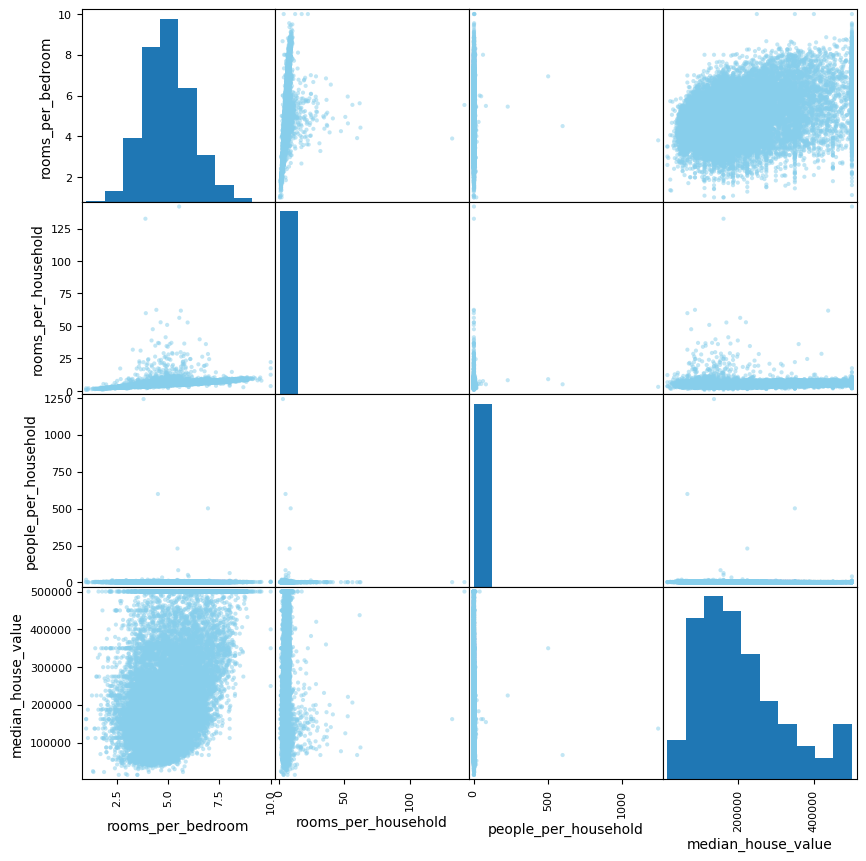

In [12]:
new_vars = housing[["rooms_per_bedroom", "rooms_per_household", "people_per_household", "median_house_value"]]
scatter_matrix(new_vars, figsize = (10, 10), color = 'skyblue');

In [13]:
housing[["total_rooms", "total_bedrooms", "population", "households"]].corr()

,total_rooms,total_bedrooms,population,households
total_rooms,1.000000,0.930380,0.857281,0.918992
total_bedrooms,0.930380,1.000000,0.877747,0.979728
population,0.857281,0.877747,1.000000,0.907186
households,0.918992,0.979728,0.907186,1.000000


4.15881642276731

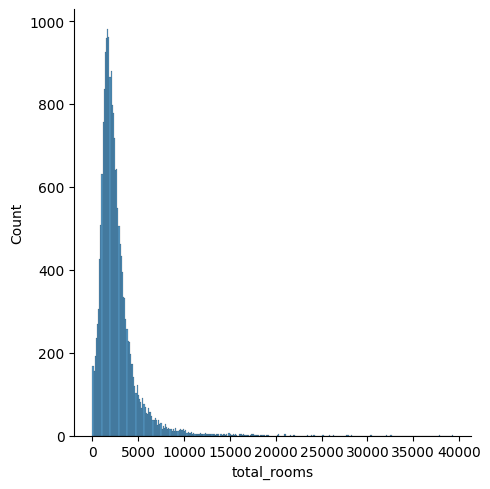

In [14]:
sns.displot(housing['total_rooms']) # Plot the right skew distribution
housing['total_rooms'].skew() # Skewness metric

In [15]:
target_total_rooms = np.log(housing['total_rooms']) # Log transformation

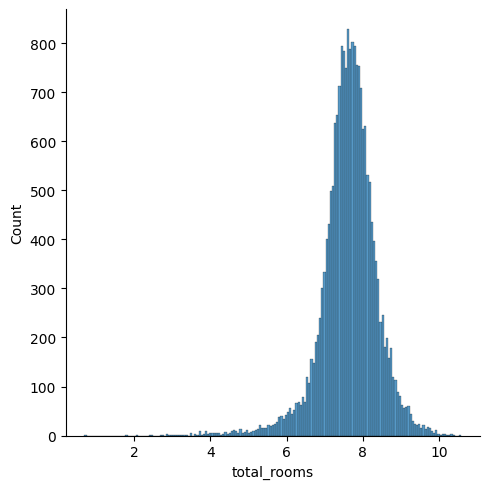

In [16]:
sns.displot(target_total_rooms) # Plot the transformed disribution

In [17]:
# Create loops to check skewness of quantative variables to examine if they need to be transformed
skewness_list = [] # Empty list for skewed values

for col in housing_quant.columns:
    skewness = housing_quant[col].skew()
    skewness_list.append((col, skewness))

sorted_skewness = sorted(skewness_list, key = lambda x: x[1])

for col, skewness in sorted_skewness:
    print(f"Skewness of {col}: {skewness}")

Skewness of longitude: -0.2978012079524362
Skewness of housing_median_age: 0.060330637599136865
Skewness of latitude: 0.46595300370997006
Skewness of median_house_value: 0.9777632739098341
Skewness of median_income: 1.6466567021344465
Skewness of households: 3.410437711667147
Skewness of total_bedrooms: 3.459546331523342
Skewness of total_rooms: 4.147343450632158
Skewness of population: 4.93585822672712


The predictors `total_rooms`, `total_bedrooms`, `population`, and `households` are the most skewed. A log transformation would help to make their distribution more symmetric.

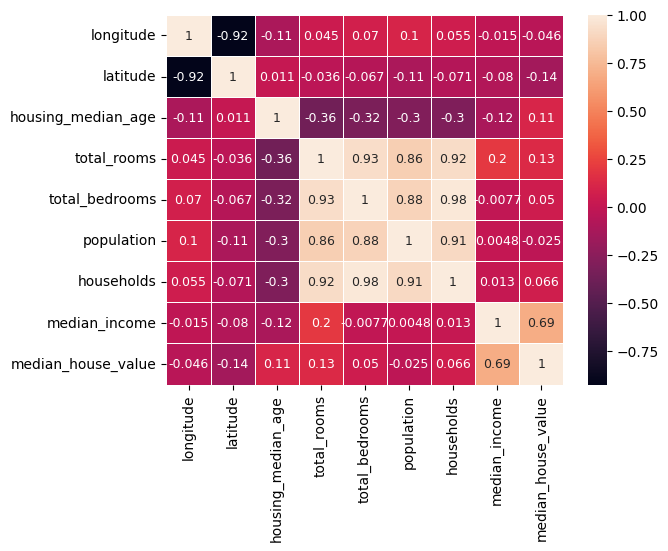

In [18]:
corr_matrix = housing_quant.corr()
sns.heatmap(corr_matrix, annot = True, linecolor = 'white', annot_kws = {"size": 9}, linewidths = 0.5, yticklabels = True, xticklabels = True,  cbar = True);
# annot = Individual box labels | linecolor = Line color between the boxes | annot_kws = Size of the font withint the box | linewiths = Line thickness between boxes | yticklabels/xticklabels = Gives the ticks | cbar = Color legend 


In [19]:
corr_pairs = corr_matrix.unstack() # List all correlation values between quantitative variables
sorted_pairs = corr_pairs.sort_values(kind = "quicksort") # Sort correlation values in an ascending order
# corr_pairs.sort_values(ascending = False) ... same result as above
sorted_pairs.head(10) # Display the first # of rows of the DataFrame

longitude           latitude             -0.924664
latitude            longitude            -0.924664
total_rooms         housing_median_age   -0.361262
housing_median_age  total_rooms          -0.361262
total_bedrooms      housing_median_age   -0.320451
housing_median_age  total_bedrooms       -0.320451
households          housing_median_age   -0.302916
housing_median_age  households           -0.302916
                    population           -0.296244
population          housing_median_age   -0.296244
dtype: float64

In [20]:
# Selecting negative/positive correlation pairs
negative_pairs = sorted_pairs[sorted_pairs < 1] # Show correlations only above or below a certain threshold
negative_pairs.sort_values(ascending = False).head(15) # So

total_bedrooms      households            0.979728
households          total_bedrooms        0.979728
total_rooms         total_bedrooms        0.930380
total_bedrooms      total_rooms           0.930380
households          total_rooms           0.918484
total_rooms         households            0.918484
households          population            0.907222
population          households            0.907222
total_bedrooms      population            0.877747
population          total_bedrooms        0.877747
                    total_rooms           0.857126
total_rooms         population            0.857126
median_income       median_house_value    0.688075
median_house_value  median_income         0.688075
total_rooms         median_income         0.198050
dtype: float64

The features `total_rooms`, `total_bedrooms`, `population`, and `households` are strongly correlated with each other.

The column `ocean_proximity` is a qualitative variable with different categories. It is always good to convert qualitative variables into quantitative before fitting machine learning models. To do so, we will use the `OrdinalEncoder` function from the preprocessing package of the sklearn library.

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
my_ordinal_encoder = OrdinalEncoder()
my_ordinal_encoder = OrdinalEncoder(categories = [['ISLAND', 'NEAR OCEAN', 'NEAR BAY', '<1H OCEAN', 'INLAND']])

In [23]:
housing["ocean_proximity_enc"] = my_ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20433 non-null  float64
 1   latitude              20433 non-null  float64
 2   housing_median_age    20433 non-null  float64
 3   total_rooms           20433 non-null  float64
 4   total_bedrooms        20433 non-null  float64
 5   population            20433 non-null  float64
 6   households            20433 non-null  float64
 7   median_income         20433 non-null  float64
 8   median_house_value    20433 non-null  float64
 9   ocean_proximity       20433 non-null  object 
 10  rooms_per_bedroom     20433 non-null  float64
 11  rooms_per_household   20433 non-null  float64
 12  people_per_household  20433 non-null  float64
 13  ocean_proximity_enc   20433 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.3+ MB


### Split Data Into Train and Test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
housing_clean = housing.drop(["total_rooms", "total_bedrooms", "population", "households", "ocean_proximity"], axis = "columns")

In [26]:
X = housing_clean.drop(["median_house_value"], axis = "columns") # Remove the response from the other predictor variables
y = housing_clean[["median_house_value"]] # Only keep the response variable
X.shape # Dimensions of Panda/NumPy type objects
y.shape # Dimensions of Panda/NumPy type objects

(20433, 1)

In [27]:
housing_train, housing_test = train_test_split(housing_clean, test_size = .2, random_state = 42)
housing.shape # Dimensions of Panda/NumPy type objects
housing_train.shape # 80% of the rows, 16346
housing_test.shape # 20% of the rows, 4087

(4087, 9)

In [28]:
housing_train.head() # Display the first # of rows of the DataFrame

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_bedroom,rooms_per_household,people_per_household,ocean_proximity_enc
17727,-121.80,37.32,14.0,4.7027,227600.0,4.774892,4.951740,3.028058,3.0
2057,-119.63,36.64,33.0,3.4107,110400.0,5.723757,5.954023,3.563218,4.0
6453,-118.06,34.12,25.0,3.6639,248100.0,4.588443,5.126482,2.434783,4.0
4619,-118.31,34.07,28.0,2.2364,305600.0,2.488936,2.642058,3.086130,3.0
15266,-117.27,33.04,27.0,3.5500,214600.0,4.691327,4.551980,3.222772,1.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# X and y are the input features (predictors) and target (response) variable separately
#  test_size parameter is the porprotion of the data allocated in the test set
#   random_state parameter initializes the random number generator to produce the same results each run 

### Fit Simple Models, $k$-nn and Linear Regression

In [30]:
from sklearn.neighbors import KNeighborsRegressor # Class when the first letter is capitalized

In [31]:
knn = KNeighborsRegressor(n_neighbors = 5) # Create an instance and set the parameter to 5 in this supervised ML algorithm for regression tasks
knn.fit(X_train, y_train) 
# X_train: Organized in a matrix where each row represents a sample and each column a feature
#  y_train: 1-dimensional array or list
#   fit: Learns to find the relationship betwen the two of the training data by computing the distance between each training sample

KNeighborsRegressor()

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression() # Create an instance to fit on training, predict on new, and evaluate the performance of the model 
lin_reg.fit(X_train, y_train, sample_weight = None) 
# Learns the parameters (X_train, y_train) of the model by minimizing a cost function (MSE) using an optimization algorithm between predicted and actual target values

LinearRegression()

### Make Predictions and Evaluate Model Performance

In [34]:
knn_preds = knn.predict(X_test) # Makes predictions on the test set
knn_preds
# knn.predict() takes the input data as its parameter and returns the predicted target values based on the learned relationship.
#  The model finds the k-nearest neighbors of each data point in X_test and returs the average target value of those neighbors (average five points).
#   Returns a 1-dimensional array

array([[177940.],
       [144760.],
       [237800.],
       ...,
       [114520.],
       [137600.],
       [106740.]])

In [35]:
lin_reg_preds = lin_reg.predict(X_test) # Makes predictions on the test set
lin_reg_preds
# lin_reg.predict() takes the input data as its parameter and returns the predicted target values based on the learned relationship.
#  The model redicts the target values by computing the dot product of the input features and the learned coefficients of the linear function. 
#   Returns as a 1-dimensional array or list that has the same length as the number of samples in X_test

array([[226471.97981885],
       [169421.6127461 ],
       [195866.61499015],
       ...,
       [110991.08570684],
       [143590.75652925],
       [174478.95885867]])

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
np.sqrt(mean_squared_error(knn_preds, y_test)) # Minimize error
# Takes two parameters: the predicted target values and the true target values, and returns the mean squared error between the two arrays. 
#  The mean squared error is computed as the average of the squared differences between the predicted and true values.
#   mean_squared_error(y_true, y_pred)

62289.089693250375

Generally, lower RMSE values are better as they indicate that the model's predictions are closer to the actual values.